## Diabetes Prediction


In [42]:
## let's start with necessary library
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
# Read the file
dataset = pd.read_csv('/content/diabetes.csv')


In [44]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


we can see there few data for columns Gluscose , Insulin , skin thickness , BMI , And Blood Pressure , which have value as 0 . That's not possible , right ?
you can do a quick search to see that one cannot have 0 value of these , let's deal with taht  . we can either remove such  data or simply replace it with their reespective mean value . let's do the latter

In [47]:
## Misconception of there lk BMI can not zero , Bp can't 0 , glucose , insulin can't zero
## Now replacing zero value in mean of the columns

dataset["Glucose"] = dataset["Glucose"].replace(0 , dataset["Glucose"].mean())
dataset["Insulin"] = dataset["Insulin"].replace(0 ,dataset["Insulin"].mean())
dataset["BloodPressure"] = dataset["BloodPressure"].replace(0 , dataset["BloodPressure"].mean())
dataset["BMI"] = dataset["BMI"].replace(0, dataset["BMI"].mean())
dataset["SkinThickness"] = dataset["SkinThickness"].replace(0 , dataset["SkinThickness"].mean())

In [48]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

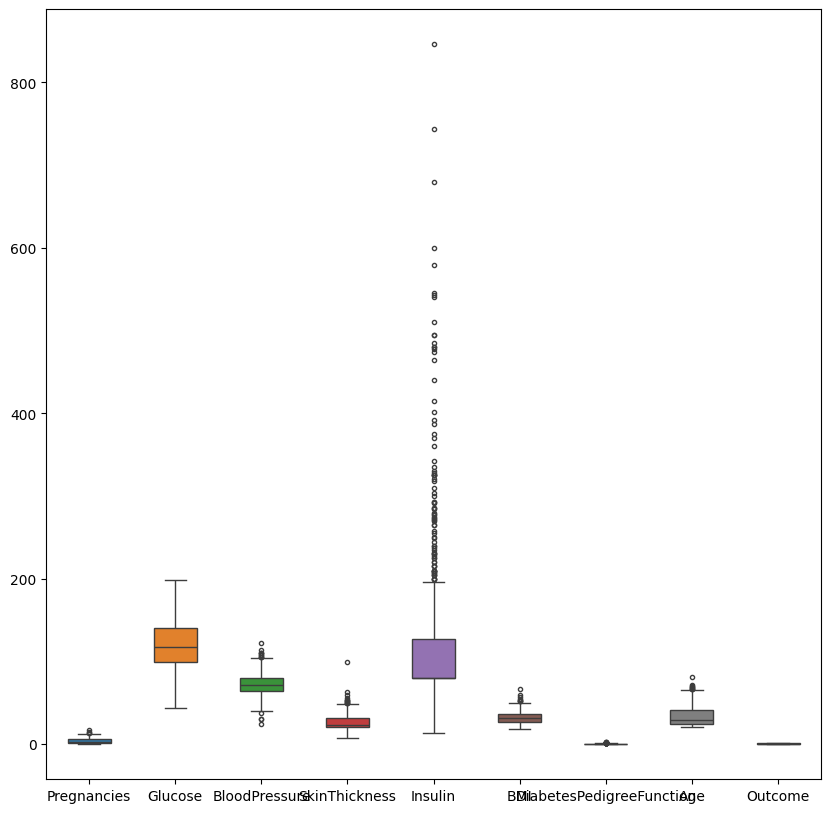

In [49]:
## Now we have with 0 values and data looks better .But , there still are  outliers present in some columns
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=dataset ,width = 0.5 , ax=ax , fliersize= 3)
#sns.heatmap(dataset.corr() , annot=True)

In [50]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [51]:
## Segregate the dependent and independent
x = dataset.drop(columns = ["Outcome"])
y = dataset["Outcome"]

In [52]:
##Seperate dataset into train and test
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [53]:
import pickle
## Standard Scalening
def scaler_standard(x_train , x_test):
  ## Scaling the data
  scaler = StandardScaler()
  x_train_scaled = scaler.fit_transform(x_train)
  x_test_scaled = scaler.transform(x_test)

  ## saving the model
  file = open('scaler.pkl' , 'wb')
  pickle.dump(scaler , file)
  file.close()

  return x_train_scaled , x_test_scaled



In [54]:
x_train_scaled , x_test_scaled = scaler_standard(x_train , x_test)

In [55]:
x_train_scaled

array([[ 0.90832902,  0.93644016,  0.45816047, ...,  0.36864973,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.81628595, -1.03864035, ..., -0.63292879,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.43249471,  1.45602768, ...,  2.81536295,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.91549686, -0.62286235, ..., -1.13371805,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.2131296 ,  0.12553806, ..., -0.36107176,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.4734559 ,  0.79078287, ..., -0.09027668,
         0.52121586,  2.94889395]])

In [56]:
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled , y_train)

LogisticRegression()

In [57]:
## Hyperparameter Tuning
## Gride Search
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')

##Parameter grid

parameters = {
    'penalty' :['l1' , 'l2'],
    'C' : np.logspace(-3,3,7),
    'solver' : ['newton-cg' , 'lbfgs' , 'liblinear'],

}

In [58]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg ,                      ## model
                   param_grid = parameters,      ## hyperparamters
                   scoring = 'accuracy',         # Metric of scoring
                   cv = 10)                      ## Number of fold
clf.fit(x_train_scaled , y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [59]:
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [60]:
clf.best_score_

0.7605235325224748

let's see how well our model formance on the test dataset .


In [61]:
y_pred = clf.predict(x_test_scaled)

In [62]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

Accuracy = accuracy_matrix (y_test , y_pred)

In [63]:
conf_mat = confusion_matrix(y_test , y_pred)
conf_mat

array([[95, 12],
       [21, 26]])

In [64]:
true_postive = conf_mat[0][0]
false_postive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [65]:
Accuracy = (true_postive + true_negative) / (true_postive + false_postive + false_negative + true_negative)
Accuracy

0.7857142857142857

In [66]:
precision = true_postive / (true_postive + false_postive)
precision

0.8878504672897196

In [67]:
recall = true_postive / (true_postive + false_negative)
recall

0.8189655172413793

In [68]:
f1_score = 2 * ((precision * recall) / (precision + recall))
f1_score

0.8520179372197308

In [69]:
import pickle
file = open('log_reg.pkl' , 'wb')
pickle.dump(log_reg , file)
file.close()